### Contents:
1. Importing Libraries andScaled  Data
2. Data Wrangling anSubsettingng
   - Scaled to 1985 only
3. Dendrograms
   - Oslo vs. Madrid
     • Single
     • Complete
     • Average
     • Ward
4. Relevanreenshots


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
# 1. Importing CSVs
path_scaled = r"C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\Basics of ML for Analysis\04 Analysis\Data Sets\02 Prepared Data\Supervised\weather-data_scaled.csv"
path_pleasant = r"C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\Basics of ML for Analysis\04 Analysis\Data Sets\01 Raw Data\Answers-Weather_Prediction_Pleasant_Weather.csv"

df_scaled = pd.read_csv(path_scaled, index_col=False)
df_pleasant = pd.read_csv(path_pleasant, index_col=False)

print("Scaled weather data shape:", df_scaled.shape)
print("Pleasant weather data shape:", df_pleasant.shape)

Scaled weather data shape: (22950, 170)
Pleasant weather data shape: (22950, 16)


In [5]:
df_scaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


---

### • Subsetting the Data to 1985

In [11]:
# Subset the dataframe for 1985
df_year = df_scaled[df_scaled['DATE'].astype(str).str.contains('1985')]
print(df_year.shape)
df_year.head()

(365, 170)


,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
9132,19850101,1,1.076130,-0.02793,0.193738,-0.215925,-1.251420,-0.405433,-0.179228,-1.065304,...,1.396477,2.167838,1.329116,-1.112744,-0.396127,-0.024706,-1.039536,-0.397835,0.108790,-0.896027
9133,19850102,1,1.076130,-0.02793,1.097107,-1.560922,-1.272899,1.077580,0.319230,-1.065304,...,0.169692,-0.363113,0.639273,-1.065618,-0.490810,-0.024706,-1.039536,-1.659606,-1.339569,-1.758766
9134,19850103,1,0.244897,-0.02793,0.645423,-0.567459,-0.939973,-0.445514,6.799183,-0.322968,...,-1.670486,-1.066155,0.415540,-0.829990,-0.490810,-0.024706,0.822684,-1.389227,-0.984311,-1.643734
9135,19850104,1,1.076130,-0.02793,0.284075,-1.224673,-1.197722,0.055504,6.799183,-1.065304,...,-2.283879,-1.487980,0.154519,-0.959585,-0.490810,-0.024706,-0.078390,-1.779775,-1.503534,-1.845040
9136,19850105,1,-0.170720,-0.02793,0.645423,-0.506322,-0.821838,-0.445514,7.297641,0.233784,...,-2.897272,-2.191022,0.285030,-0.900678,-0.490810,-0.024706,0.282040,-1.960028,-1.640172,-2.046346


In [17]:
print(df_year.columns.tolist())

['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_pr

### • Performing Hierarchical Clustering (Dendrograms) on Oslo and Madrid

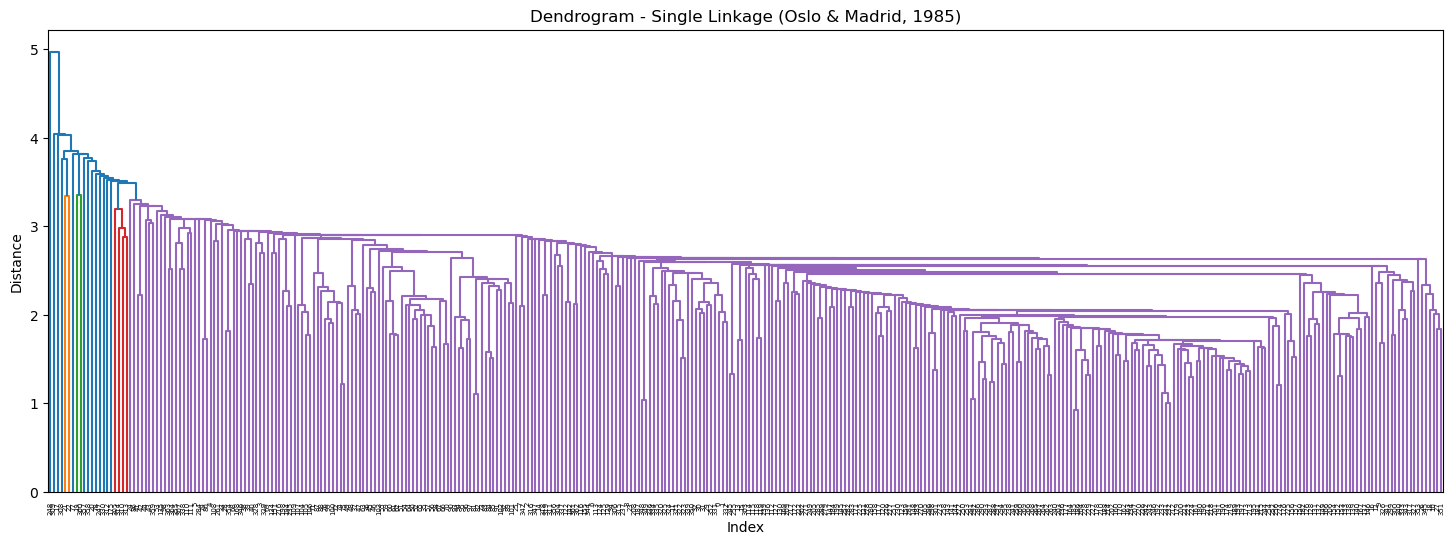

In [19]:
# Defining columns to cluster on: Oslo + Madrid
cols_of_interest = [
    'OSLO_cloud_cover',
    'OSLO_wind_speed',
    'OSLO_humidity',
    'OSLO_pressure',
    'OSLO_global_radiation',
    'OSLO_precipitation',
    'OSLO_snow_depth',
    'OSLO_sunshine',
    'OSLO_temp_mean',
    'OSLO_temp_min',
    'OSLO_temp_max',
    'MADRID_cloud_cover',
    'MADRID_wind_speed',
    'MADRID_humidity',
    'MADRID_pressure',
    'MADRID_global_radiation',
    'MADRID_precipitation',
    'MADRID_sunshine',
    'MADRID_temp_mean',
    'MADRID_temp_min',
    'MADRID_temp_max'
    # 'MADRID_snow_depth' removed since it doesn't exist
]

# Subsetting 1985 data to just these columns
df_subset = df_year[cols_of_interest]

# Performing single linkage clustering
Z_single = linkage(df_subset, method="single")

# Plot dendrogram
plt.figure(figsize=(18,6))
dendrogram(Z_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title("Dendrogram - Single Linkage (Oslo & Madrid, 1985)")
plt.show()

### • Complete Linkage

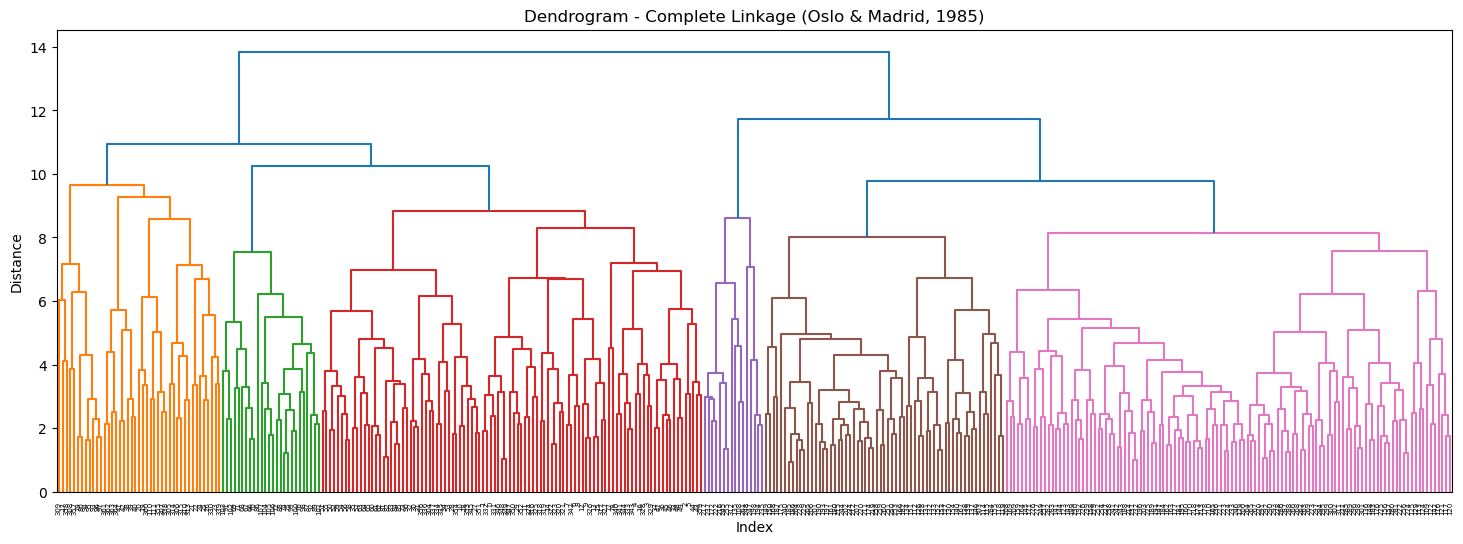

In [21]:
Z_complete = linkage(df_subset, method="complete")

plt.figure(figsize=(18,6))
dendrogram(Z_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title("Dendrogram - Complete Linkage (Oslo & Madrid, 1985)")
plt.show()

### • Average Linkage

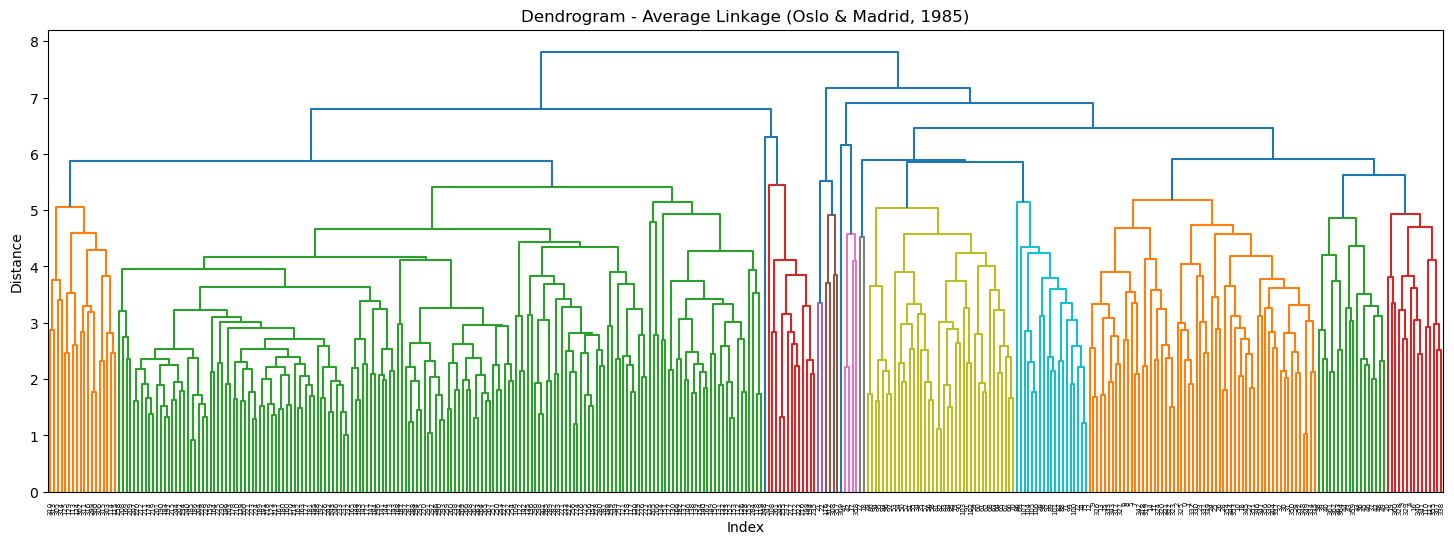

In [27]:
Z_average = linkage(df_subset, method="average")

plt.figure(figsize=(18,6))
dendrogram(Z_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title("Dendrogram - Average Linkage (Oslo & Madrid, 1985)")
plt.show()


### • Ward Linkage


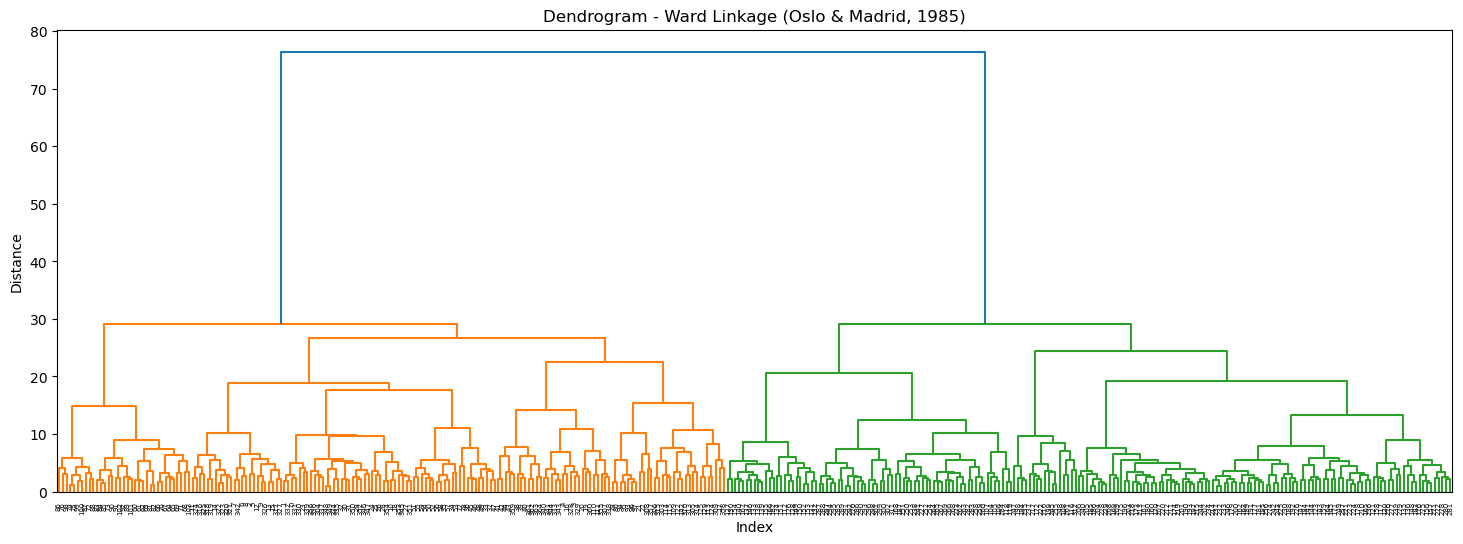

In [30]:
Z_ward = linkage(df_subset, method="ward")

plt.figure(figsize=(18,6))
dendrogram(Z_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title("Dendrogram - Ward Linkage (Oslo & Madrid, 1985)")
plt.show()


---

## Recording the Number of Clusters

In [34]:
# Cutting at distance=10 (this is arbitrary))
clusters_single = fcluster(Z_single, t=10, criterion='distance')
clusters_complete = fcluster(Z_complete, t=10, criterion='distance')
clusters_average = fcluster(Z_average, t=10, criterion='distance')
clusters_ward = fcluster(Z_ward, t=10, criterion='distance')

print("Single Linkage Clusters:", np.unique(clusters_single))
print("Complete Linkage Clusters:", np.unique(clusters_complete))
print("Average Linkage Clusters:", np.unique(clusters_average))
print("Ward Linkage Clusters:", np.unique(clusters_ward))

Single Linkage Clusters: [1]
Complete Linkage Clusters: [1 2 3 4 5]
Average Linkage Clusters: [1]
Ward Linkage Clusters: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


---

The results indicate that both the single and average linkage methods tend to merge nearly all data points into a single large cluster. This outcome often arises from single linkage’s “chaining effect,” where points gradually get linked in a linear fashion. Likewise, average linkage can blend subgroups when their pairwise distances are relatively small, causing the dataset from Oslo and Madrid (for 1985) to appear quite homogeneous at the chosen distance threshold.

In contrast, complete linkage produced five distinct clusters, signaling a more moderate separation of daily weather observations. Ward’s method, which aims to minimize within-cluster variance, uncovered an even finer segmentation of 22 clusters. These differences highlight how strongly hierarchical clustering can be influenced by linkage criteria and distance thresholds, underscoring the value of experimenting with multiple approaches to determine the most meaningful grouping for a given dataset.